<a href="https://colab.research.google.com/github/aditya19991010/tandem-repeats-viterbi/blob/colab/Tandem_reapeats_Viterbi_algo_trelis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Tandem Repeat Mutation and Reconstruction Using the Viterbi Algorithm


## Introduction
Tandem repeats, particularly dinucleotide repeats such as (AT)n or (CG)n, are
common features of many genomes and play roles in genome stability, gene regulation, and evolution. However, during DNA replication and recombination, these repeats are susceptible to mutations like insertions, deletions, or repeat unit mismatches, leading to sequence variation. Modeling the formation, corruption, and potential correction of tandem repeats can help in understanding repeat instability, disease association, and evolutionary patterns.

In this study, we simulate a tandem repeat system to analyze the fidelity of sequence replication and reconstruct the original repeat unit structure. Starting from a defined repeating pattern (e.g., AT), we generate a synthetic repeat region (mother sequence). Mutations are introduced to simulate real-world errors during replication or sequencing. To recover the original pattern, we apply the Viterbi algorithm within a Hidden Markov Model (HMM) framework using known transition and emission probabilities. Finally, we evaluate reconstruction accuracy using Bit Error Rate (BER).

## 1. Generate Tandem Repeat (Mother Sequence)
- Define a base repeat unit, e.g., 'AT'.
- Set the number of repeat units n, and generate a synthetic tandem repeat sequence (e.g., ATATAT...).

Optionally, allow probabilistic switching between different dinucleotides (e.g., AT ↔ GC) to mimic natural variability in repeat units.

- Define transition probabilities:
  - P(rep → rep): Probability of continuing the same repeat unit.
  - P(rep → alt): Probability of switching to a different repeat.

## 2. Introduce Mutations in the Repeat Region (Corrupted Daughter Sequence)
Simulate mutational events such as:
 - Base substitutions within repeat units.
 - Insertion or deletion of repeat units.
 - Transition between repeat types.
 - Define emission probabilities:
  - P(correct → correct): No mutation.
  - P(correct → incorrect): Mutation occurs.

Apply these probabilities to introduce noise and generate a corrupted repeat sequence, mimicking replication slippage or sequencing error.

## 3. Reconstruct Repeat Pattern Using Viterbi Algorithm
Use a Hidden Markov Model (HMM):
 - States: Possible repeat units (AT, GC, TA, etc.).
 - Observations: Bases in the corrupted daughter sequence.
 - Initial probabilities: Probability of starting with a particular repeat.
 - Transition probabilities: Probability of one repeat unit following another.
 - Emission probabilities: Likelihood of observing a corrupted output from a true repeat.

Apply the Viterbi algorithm to decode the most probable original (mother) repeat sequence.

## 4. Evaluate Reconstruction Accuracy
Compare the reconstructed (predicted) repeat sequence with the original (true) mother repeat sequence.

Calculate Bit Error Rate (BER) or Repeat Unit Accuracy:

 - BER = (Number of mismatches) / (Length of sequence).

## 5. Visualization
Visualize and analyze the impact of varying mutation rates and repeat lengths on reconstruction fidelity.

## Code

### Required
	States = S = \{s_1, s_2, ..., s_N\}
	Observations = O = {o_1, o_2, ..., o_T\}
	Start probabilities = pi(s_i)
	Transition probabilities = a_{ij} = P(s_j| s_i)
	Emission probabilities = b_j(o_t) = P(o_t |s_j)


### Algorithm

#### Generate mother sequence

In [ ]:
import numpy as np

np.random.seed(15)

def generate_mother_Seq(num):
  # Initialize the sequence
  mom_seq = np.zeros(num, dtype=int)

  #setting 1st position as modified
  mom_seq[0] = np.random.randint(0,2)

  # Set the transition probabilities
  alpha = 0.5  # P(1 -> 1)
  beta = 0.5   # P(0 -> 0)

  # Generate the sequence
  for i in range(1, num):
      if mom_seq[i-1] == 1:
          if np.random.rand() <= alpha:
              mom_seq[i] = 1
          else:
              mom_seq[i] = 0
      else:  # mom_seq[i-1] == 0
          if np.random.rand() <= beta:
              mom_seq[i] = 0
          else:
              mom_seq[i] = 1
  return mom_seq

####HMM model Class

In [ ]:
class Dataframe:
  """
  A class to represent a Hidden Markov Model for decoding sequences using the Viterbi algorithm.

      Parameters:
    -----------
    init_prob : dict
        Initial probabilities for each state.
    trans_prob : dict
        Transition probabilities between states.
    emis_prob : dict
        Emission probabilities of observations given states.
    mom_seq : list
        Mother sequence (original bit sequence).
    observ : list
        Observed sequence (received sequence).
    states : tuple
        States used in the model.
    """



  def __init__(self,init_prob , trans_prob, emis_prob, mom_seq, observ, states):
    """
    Initialize the Dataframe object with model parameters and sequences.

    Parameters:
    -----------
    init_prob : dict
        Initial probabilities for each state.
    trans_prob : dict
        Transition probabilities between states.
    emis_prob : dict
        Emission probabilities of observations given states.
    mom_seq : list
        Mother sequence (original bit sequence).
    observ : list
        Observed sequence (received sequence).
    states : tuple
        States used in the model.
    """

    self.init_prob = init_prob
    self.trans_prob = trans_prob
    self.mom_seq = mom_seq
    self.emis_prob = emis_prob
    self.observ = observ
    self.states = states



  def viterbi_decode(self):
    """
  Perform Viterbi decoding on the observed sequence.

    Returns:
    --------
    prob : float
        Probability of the most probable state sequence.
    path : list
        Most probable sequence of hidden states corresponding to the observations.
  """


    # Input
    V= [{}] # create a list of dictionaries
    path = {}

    # Initialization | Start probability × Emission probability for the first observation|  V_1(j) = pi(s_j) * b_j(o_1)
    for state in self.states:
      V[0][state] = self.init_prob[state] * self.emis_prob[state][self.observ[0]]
      path[state] = [state]

      #print("Max probability: ",V)
      #print("List of states",path)

    # Recursion | V_t(j) = max_{i} ( V_{t-1}(i) * a_{ij} * b_j(o_t) )
      # i is looping over all possible previous states.

      # Tracking | {path}_j = {path}_i + [s_j] | i is the state that gave the maximum probability
    # Run viterbi
    for i in range(1, len(self.observ)):
      V.append({})
      newpath = {}

      for present_state in self.states:
          (prob, prev_state) = max(
              (V[i-1][prev_state] * self.trans_prob[prev_state][present_state] * self.emis_prob[present_state][self.observ[i]], prev_state)
               for prev_state in self.states)

          #print("max prob",prob, "| prev state", prev_state)
          V[i][present_state] = prob
          newpath[present_state] = path[prev_state] + [present_state]

          #print(newpath)
      path = newpath

    # Termination | {best_prob} = max_j V_T(j)
    n = len(self.observ) - 1
    (prob, state) = max((V[n][state], state) for state in self.states)

    # Output
    return (prob, path[state])


#####Bir error rate calculation

![](https://www.build-electronic-circuits.com/wp-content/uploads/2022/09/Truth-table-XOR-gate-417x500.png)

In [ ]:
def calculate_biterror(mom_seq, pred_seq):
  """
  Calculate the bit error rate (BER) between two sequences.

  Parameters:
  -----------
  mom_seq : list or np.array
      The original (mother) sequence.
  pred_seq : list or np.array
      The estimated sequence from Viterbi decoding.

  Returns:
  --------
  biterror : float
      The proportion of bits that differ between mom_seq and path.
  """

  xor = np.logical_xor(mom_seq, path)
  biterror = np.sum(xor) / xor.size
  return biterror


####Trelis diagram using networkx

In [ ]:
#Used LLM to create the Trellis diagram

import networkx as nx
import matplotlib.pyplot as plt

def draw_trellis(obs, states, viterbi_path):
    G = nx.DiGraph()

    # Add nodes for each time step
    for i, o in enumerate(obs):
        for state in states:
            G.add_node((i, state), label=f"{state}\n(t={i})")

    # Add edges for all possible transitions
    for t in range(1, len(obs)):
        for prev_state in states:
            for curr_state in states:
                G.add_edge((t-1, prev_state), (t, curr_state))

    # Highlight Viterbi path
    edge_colors = []
    for u, v in G.edges():
        u_t, u_state = u
        v_t, v_state = v
        if viterbi_path[u_t] == u_state and viterbi_path[v_t] == v_state:
            edge_colors.append('red')
        else:
            edge_colors.append('gray')

    # Position nodes in grid
    pos = {(i, state): (i, k) for k, state in enumerate(states) for i in range(len(obs))}

    plt.figure(figsize=(20, 5))
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
            node_size=200, node_color='lightblue', edge_color=edge_colors,
            font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Trellis Diagram with Viterbi Most Probable Path", fontsize=15)
    # plt.axis('off')
    plt.show()

###Test case

In [ ]:
#Generate mother sequence
num_nucl = 10
mom_seq = generate_mother_Seq(num=num_nucl)


#Probability
alpha = 0.6 #1: modified -> 1: modified
beta = 0.6 # # 0: unmodified-> 0: unmodified


states = (0, 1)  # 0: unmodified, 1: modified
# daughter_seq1 = [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]
daughter_seq = mom_seq


# Initial probabilities (starting in state 0 or 1)
init_probability = {
    0: 0.3,   # unmodified
    1: 0.7    # modified
}

# Transition probabilities: P(next_state | current_state)
transition_probability = {
    0: {0: beta, 1: (1-beta)},  # unmodified -> unmodified , unmodified -> modified
    1: {1: alpha, 0: (1-alpha)}   # modified -> modified , modified -> unmodified
}

# Emission probabilities: P(observation | state)
# (Example — you'll need to adapt emission according to your setup)

emission_probability = {
    0: {0: 0.7, 1: 0.3},  # unmodified: mostly emits 0
    1: {1: 0.6, 0: 0.4}   # modified: mostly emits 1
}

decode_data = Dataframe(
    observ=daughter_seq,
    init_prob=init_probability,
    states=states,
    trans_prob=transition_probability,
    emis_prob=emission_probability,
    mom_seq=mom_seq
)

prob, path = decode_data.viterbi_decode()
biterror = calculate_biterror(path,mom_seq)

print(f"Mother sequence: {mom_seq}")
print(f"Observed daughter sequence \n{daughter_seq}: \n\nMost probable sequence \n{path} \n\nprobability ={prob:.6f}")
print(f"Bit error rate: {biterror:.6f}")



Mother sequence: [0 0 0 1 0 1 0 0 0 0]
Observed daughter sequence 
[0 0 0 1 0 1 0 0 0 0]: 

Most probable sequence 
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0] 

probability =0.000016
Bit error rate: 0.000000


## Trelis diagram

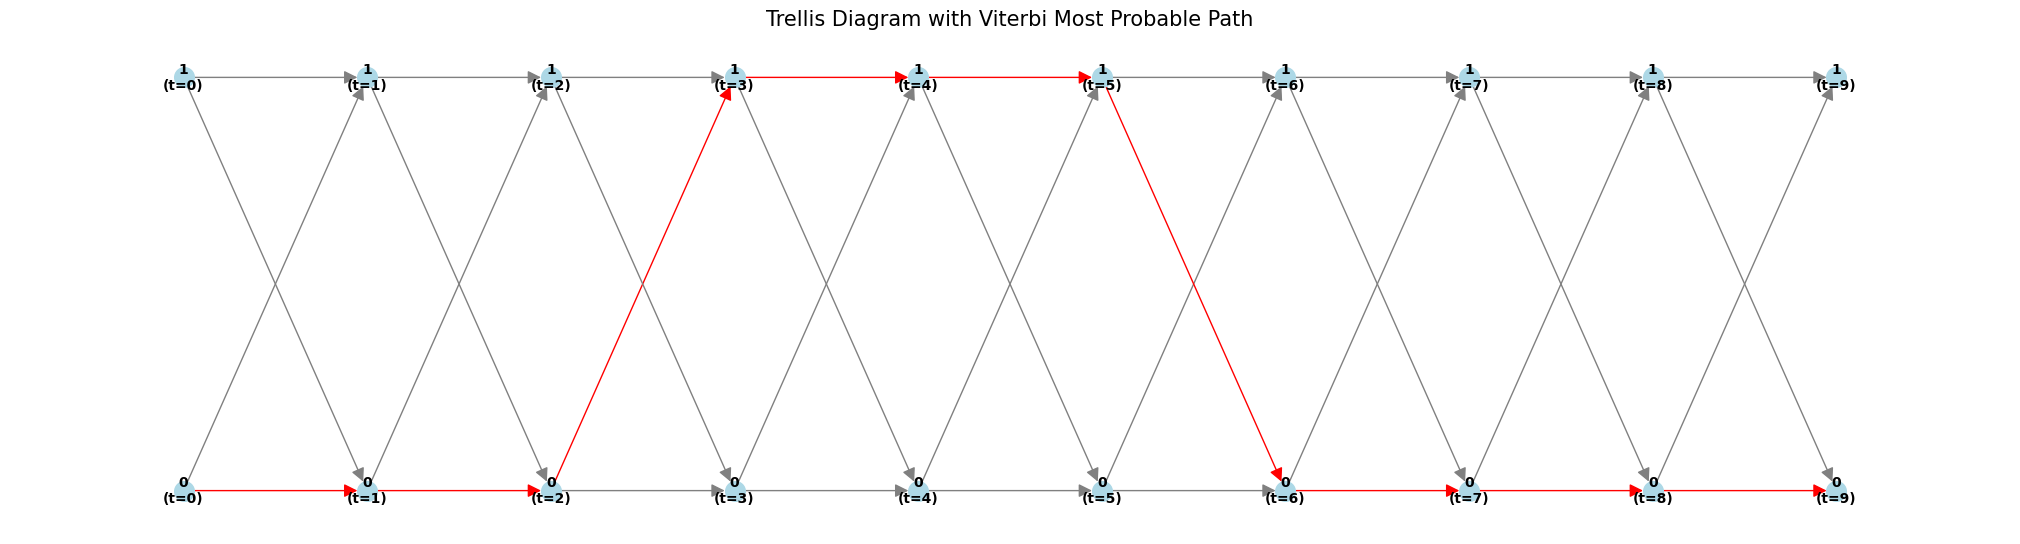

In [ ]:
draw_trellis(obs=daughter_seq, states=states, viterbi_path=path)